# <b>1 <span style='color:#3f4d63'>|</span> Introduction</b>

<div style="color:white;display:fill;
            background-color:#3f4d6f;font-size:150%;
            font-family:Nexa;letter-spacing:0.5px">
    <p style="padding: 8px;color:white;"><b>1.1 | Table of contents</b></p>
</div>

* **<span style = 'color:red'>Exploratory Data Analysis</span>**
    * **Basic information**
    * **Distributions**
        * Categorical Values
        * Integers Values
        * Floating Values
        * Normal Distribution Test for Floating Values
        * Distribution of dependent variable
    * **Correlations**
* **<span style = 'color:red'>Feature Engineering</span>**
    * **Handling Categorical Features**
    * **Handling Missing Values**
    * **Feature Scaling**
    * **Outlier Detection**
* **<span style = 'color:red'>Feature Selection</span>**
    * **Variance Threshold**
        * Theory
        * Code
    * **Information Gain Method**
        * Theory
        * Code
    * **ExtraTree**
        * Code
* **<span style = 'color:red'>Model</span>**
    * **Preparing Test set**
    * **GroupK Fold**
    * **Combining Results**
* **<span style = 'color:red'>Future Work</span>**

In [1]:
import pandas as pd 
import numpy as np
from scipy.stats import shapiro
from termcolor import colored
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_selection import VarianceThreshold
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import mutual_info_classif
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.model_selection import GroupKFold
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import roc_auc_score
import gc

In [2]:
trainDF = pd.read_csv('../input/tabular-playground-series-aug-2022/train.csv')
trainDF.drop('id', axis=1, inplace=True)
testDF = pd.read_csv('../input/tabular-playground-series-aug-2022/test.csv')
testDF.drop('id', axis=1, inplace=True)

In [3]:
trainPseudoDF = trainDF.copy()

In [4]:
def infoDF(data):
    floatColCounter = 0
    floatCols = []
    intColCounter = 0
    intCols = []
    stringColCounter = 0
    stringCols = []
    print('No of rows-> {}, No of columns-> {}'.format(data.shape[0], data.shape[1]))
    print('          ------------------------          ')
    for column in data.columns:
        if data[column].dtype == int:
            intColCounter += 1
            print('{} dtype -> integer, % of null values-> {}%, No of distinct values-> {}'.format(column, round((data[column].isnull().sum()/data.shape[0])*100, 2), data[column].nunique()))
            intCols.append(column)
            print('          ------------------------          ')
        elif data[column].dtype == float:
            floatColCounter += 1
            print('{} dtype -> float, % of null values-> {}%, No of distinct values-> {}'.format(column, round((data[column].isnull().sum()/data.shape[0])*100, 2), data[column].nunique()))
            floatCols.append(column)
            print('          ------------------------          ')
        else:
            stringColCounter += 1
            print('{} dtype -> string, % of null values-> {}%, No of distinct values-> {}'.format(column, round((data[column].isnull().sum()/data.shape[0])*100, 2), data[column].nunique()))
            stringCols.append(column)
            print('          ------------------------          ')
            
    print('No of integer column-> {}, No of floating column-> {}, No of string or object columns-> {}'.format(intColCounter, floatColCounter, stringColCounter))
    print('          ------------------------          ')
    print('% of Null/Missing Values in training data-> {}%'.format(round((data.isnull().sum().sum()/(data.shape[0]*trainDF.shape[1]))*100, 2)))
    print('          ------------------------          ')
    return intCols, floatCols, stringCols

# <b>2 <span style='color:#3f4d63'>|</span> Exploratory Data Analysis</b>

<div style="color:white;display:fill;
            background-color:#3f4d6f;font-size:150%;
            font-family:Nexa;letter-spacing:0.5px">
    <p style="padding: 8px;color:white;"><b>2.1 | Basic information</b></p>
</div>

To start with, we're gonna take a brief view on the dataset given in order to get some basic information about it: 

* We're gonna show some sample rows and columns of the dataframe.
* Examine which type of features we've given.
* Find out whether there are missing values or not.
* No of distinct values of given feature.

In [5]:
intColumns, floatColumns, stringColumns = infoDF(trainDF)

No of rows-> 26570, No of columns-> 25
          ------------------------          
product_code dtype -> string, % of null values-> 0.0%, No of distinct values-> 5
          ------------------------          
loading dtype -> float, % of null values-> 0.94%, No of distinct values-> 11950
          ------------------------          
attribute_0 dtype -> string, % of null values-> 0.0%, No of distinct values-> 2
          ------------------------          
attribute_1 dtype -> string, % of null values-> 0.0%, No of distinct values-> 3
          ------------------------          
attribute_2 dtype -> integer, % of null values-> 0.0%, No of distinct values-> 4
          ------------------------          
attribute_3 dtype -> integer, % of null values-> 0.0%, No of distinct values-> 4
          ------------------------          
measurement_0 dtype -> integer, % of null values-> 0.0%, No of distinct values-> 29
          ------------------------          
measurement_1 dtype -> integer, % 

<div style="color:white;display:fill;
            background-color:#3f4d6f;font-size:150%;
            font-family:Nexa;letter-spacing:0.5px">
    <p style="padding: 8px;color:white;"><b>2.2 | Distributions</b></p>
</div>

In this first section, we're gonna focus on analysing every feature's distribution and its related statistical information. To start with, let's plot the distributions in order to determine whether features are distributed normally. 
> We're gonna distinguish between different categorical features and we can se the distribution of all three categorical feature of train set.

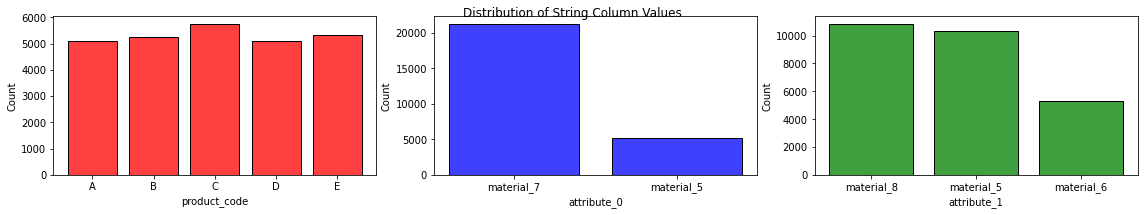

In [6]:
figure = plt.figure(figsize=(16, 3))
colors = ['red', 'blue', 'green']
for i in range(len(stringColumns)):
    plt.subplot(1, 3, i+1)
    sns.histplot(trainDF[stringColumns[i]], shrink=0.8, color=colors[i])
figure.tight_layout(h_pad=1.0, w_pad=0.5)
plt.suptitle('Distribution of String Column Values')
plt.show()

> Below is the code for the distribution of the integer feautre and and the graph should show un-even spread as we have seen in basic information that all the integers values conatin 4-5(max) distinct values.

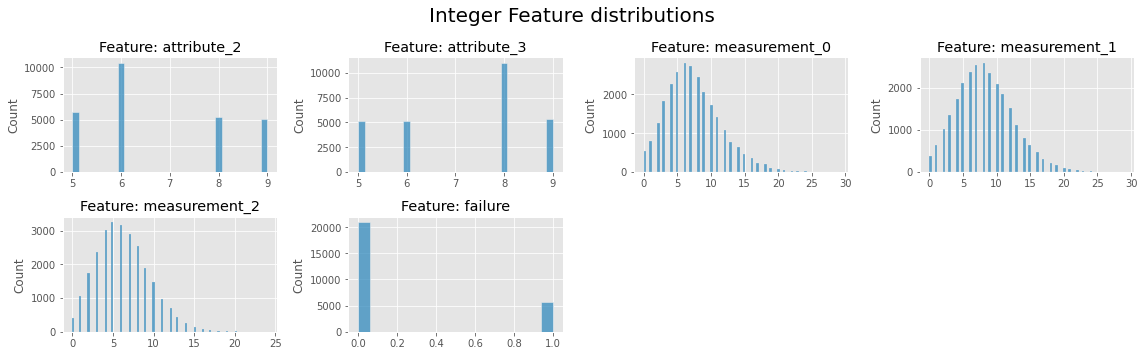

In [7]:
fig=plt.figure(figsize=(16, 5))
for i, f in enumerate(intColumns):
    plt.style.use('ggplot')
    plt.subplot(2, 4, i+1)
    sns.histplot(trainDF[f])
    plt.title('Feature: {}'.format(f))
    plt.xlabel('')
    
fig.suptitle('Integer Feature distributions',  size=20)
fig.tight_layout()  
plt.show()

> After integer we look at floating value feature which should show different distribution of values integer value feature as there way more distinct feature and its also clear from graph. Most of the feature seen to be normally distributed.

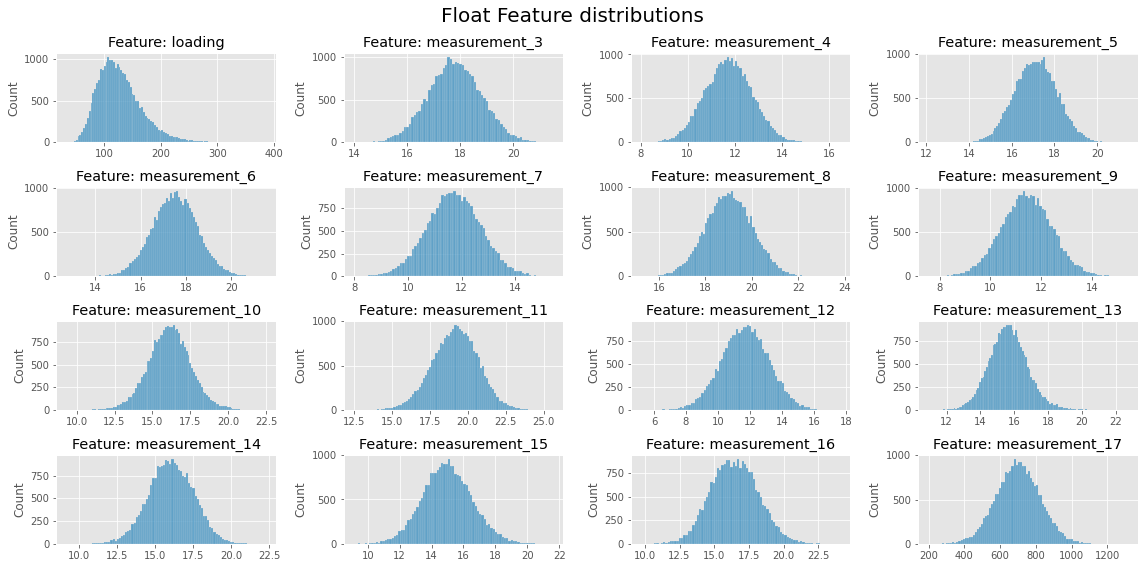

In [8]:
fig=plt.figure(figsize=(16, 8))
for i, f in enumerate(floatColumns):
    plt.style.use('ggplot')
    plt.subplot(4, 4, i+1)
    sns.histplot(trainDF[f])
    plt.title('Feature: {}'.format(f))
    plt.xlabel('')
    
fig.suptitle('Float Feature distributions',  size=20)
fig.tight_layout()  
plt.show()

📌 **Early insights:**

* It seems that every `float` feature is distributed normally. By contrast, that's not what happens when talking about `ìnt` features. 

Thus, let's determine it. We can proceed with different methods. Let's show some of them: 

**Shapiro-Wilk Test** (Code taken from [TPS Jul 22 Advanced. Author: Torch me](https://www.kaggle.com/code/kartushovdanil/tps-jul-22-advanced-2-sol))

This test is used to test whether a dataset is distributed normally or not. The null hypothesis is that a sample $$x_1\hspace{0.1cm},\hspace{0.1cm}\cdots\hspace{0.1cm},\hspace{0.1cm}x_n$$ comes from a normally distributed population. It was published in 1965 by Samuel Shapiro and Martin Wilk. **It is considered one of the most powerful tests for normality testing.** The test stadistic will be: 

$$W = \frac{(\sum_{i=1}^{n}a_{i}x_i)^2}{\sum_{i=1}^{n}(x_i - \bar{x})^2}$$

where

* $x_i$ is the number occupying the i-th position in the sample (with the sample ordered from smallest to largest).
* $\bar{x}$ is the sample mean. 
* Variables $a_i$ are calculated this way: 

$$(a_1, ... , a_n) = \frac{m^T V^{-1}}{(m^T V^{-1}V^{-1}m)^{1/2}} \hspace{2cm}m = (m_1 , ... , m_n)$$

where $m_1 , ... , m_n$ are the mean values of the ordered statistic, of independent and identically distributed random variables, sampled from normal distributions and $V$ denotes the covariance matrix of that order statistic. **The null hypothesis is rejected if W is too small. The value of W can range from 0 to 1.**

In [9]:
for col in intColumns+floatColumns:
    stat, p_value = shapiro(trainDF[col])  
    alpha = 0.05
    if p_value > alpha: 
        result = colored('Accepted', 'green')  
    else:
        result = colored('Rejected','red')        
    print('Feature: {}\t Hypothesis: {}'.format(col, result))

Feature: attribute_2	 Hypothesis: Rejected
Feature: attribute_3	 Hypothesis: Rejected
Feature: measurement_0	 Hypothesis: Rejected
Feature: measurement_1	 Hypothesis: Rejected
Feature: measurement_2	 Hypothesis: Rejected
Feature: failure	 Hypothesis: Rejected
Feature: loading	 Hypothesis: Accepted
Feature: measurement_3	 Hypothesis: Accepted
Feature: measurement_4	 Hypothesis: Accepted
Feature: measurement_5	 Hypothesis: Accepted
Feature: measurement_6	 Hypothesis: Accepted
Feature: measurement_7	 Hypothesis: Accepted
Feature: measurement_8	 Hypothesis: Accepted
Feature: measurement_9	 Hypothesis: Accepted
Feature: measurement_10	 Hypothesis: Accepted
Feature: measurement_11	 Hypothesis: Accepted
Feature: measurement_12	 Hypothesis: Accepted
Feature: measurement_13	 Hypothesis: Accepted
Feature: measurement_14	 Hypothesis: Accepted
Feature: measurement_15	 Hypothesis: Accepted
Feature: measurement_16	 Hypothesis: Accepted
Feature: measurement_17	 Hypothesis: Accepted


/opt/conda/lib/python3.7/site-packages/scipy/stats/morestats.py:1760: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


> Finally distribution of dependent vairable and from the first look itself, it seem to be an imbalance in dependen feature which wee need to tackle in model creation.

<AxesSubplot:xlabel='failure', ylabel='Count'>

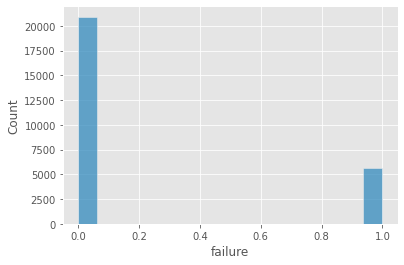

In [10]:
sns.histplot(trainDF['failure'])

It's convenient not to use features that are correlated (hence redundant), when trying to make a proper ML application. Thus, in this section, our main aim will be to analyse the different relationships between each of the features. Thus, we'll be able to determine which features are linearly related.

📌 Insights:

It seems that attribute features are lightly correlated with measurement features.
When talking about float features, if we recap which features are normally distributed and these features seem to  be correlated.
Most correlated features are attribute_01 and attribute_00.

Text(0.5, 1.0, 'Correlations')

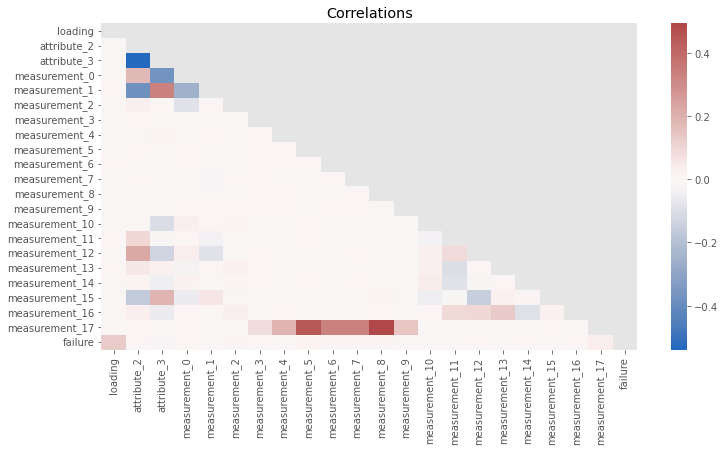

In [11]:
plt.figure(figsize=(12,6))
corr = trainPseudoDF.corr()
matrix = np.triu(corr)
sns.heatmap(corr, mask = matrix, center = 0, cmap = 'vlag').set_title('Correlations')

# <b>3 <span style='color:#3f4d63'>|</span> Feature Engineering</b>

<div style="color:white;display:fill;
            background-color:#3f4d6f;font-size:150%;
            font-family:Nexa;letter-spacing:0.5px">
    <p style="padding: 8px;color:white;"><b>3.1 | Handling Categorical Values</b></p>
</div>

Firsly we will have glimpse on the values of the categorical feature so that we can come up with a strategy of handling categorical values.

In [12]:
for i in stringColumns:
    print('Unique Values for {} -> {}'.format(i, trainDF[i].unique()))

Unique Values for product_code -> ['A' 'B' 'C' 'D' 'E']
Unique Values for attribute_0 -> ['material_7' 'material_5']
Unique Values for attribute_1 -> ['material_8' 'material_5' 'material_6']


* **Proudct Type:** Product type seem to have 5 distinct values in train and 4 distinct values in test thus it not feasable to use any encoder technique to apply on product type as it will have no information of product code importance while predicting for test set.
* **Attribute 0:** we can simply fetch number from their values by removing material and use it as final feature and alos same for test set feature as thses values contain in both train and test set.
* **Attribute 0**: we can simply fetch number from their values by removing material and use it as final feature and alos same for test set feature as thses values contain in both train and test set.

In [13]:
trainPseudoDF['attribute_1'] = trainPseudoDF['attribute_1'].str.split('_', 1).str[1].astype('int')
trainPseudoDF['attribute_0'] = trainPseudoDF['attribute_0'].str.split('_', 1).str[1].astype('int')

<div style="color:white;display:fill;
            background-color:#3f4d6f;font-size:150%;
            font-family:Nexa;letter-spacing:0.5px">
    <p style="padding: 8px;color:white;"><b>3.2 | Handling Missing Values</b></p>
</div>

📌 **Early insights:**

* All the null values in float value features. 
* All the floating value feature are normally distributed
* **Null Values/ Missing Values**: Because of the above insights replacing the missing values with mean seem to be most easy, less computaional and efficient solution.

In [14]:
for col in floatColumns:
    if trainPseudoDF[col].isnull().sum():
        trainPseudoDF[col].fillna(trainPseudoDF[col].mean(), inplace=True)

In [15]:
trainPseudoDF[floatColumns].isnull().sum()

loading           0
measurement_3     0
measurement_4     0
measurement_5     0
measurement_6     0
measurement_7     0
measurement_8     0
measurement_9     0
measurement_10    0
measurement_11    0
measurement_12    0
measurement_13    0
measurement_14    0
measurement_15    0
measurement_16    0
measurement_17    0
dtype: int64

<div style="color:white;display:fill;
            background-color:#3f4d6f;font-size:150%;
            font-family:Nexa;letter-spacing:0.5px">
    <p style="padding: 8px;color:white;"><b>3.3 | Feature Scaling</b></p>
</div>

📌 **Early insights:**
* As we know, there is a drastic change in range of integer, floating values features and in categorical feature thus it semm feasible to bring all feature value in a single range this scaling feature seems to be a logical steps

In [16]:
scalerModel = StandardScaler().fit(trainPseudoDF.drop(['failure', 'product_code'], axis=1))
scaledPseudoDF = scalerModel.transform(trainPseudoDF.drop(['failure', 'product_code'], axis=1))
scaledPseudoDF = pd.DataFrame(scaledPseudoDF, columns=trainPseudoDF.drop(['failure', 'product_code'], axis=1).columns)
scaledPseudoDF

,loading,attribute_0,attribute_1,attribute_2,attribute_3,measurement_0,measurement_1,measurement_2,measurement_3,measurement_4,...,measurement_8,measurement_9,measurement_10,measurement_11,measurement_12,measurement_13,measurement_14,measurement_15,measurement_16,measurement_17
0,-1.228625,0.496233,1.158182,1.525966,-1.538285,-0.101025,-0.055370,-0.681939,0.249978,7.972294e-01,...,1.143458,-7.775613e-01,-0.188685,-1.067610,2.418513,-0.559057,0.000000,-1.316944,-1.083606,0.532994
1,-1.105315,0.496233,1.158182,1.525966,-1.538285,1.599402,-1.246039,-0.984141,0.424027,-1.947277e-01,...,-1.148949,1.042531e+00,1.334153,-0.850447,0.036401,-0.825188,-0.433453,-0.403199,-0.506041,-0.162976
2,-1.168644,0.496233,1.158182,1.525966,-1.538285,1.113565,-1.722306,-0.379737,0.267081,-8.112937e-02,...,-0.745299,1.316160e+00,-0.372476,0.000000,1.451949,0.948121,1.795538,-0.605283,0.905852,-0.321446
3,-0.688791,0.496233,1.158182,1.525966,-1.538285,1.356484,-1.484172,-0.077535,-0.499536,-5.517511e-01,...,0.035697,1.066102e+00,0.166498,-0.537893,-1.165742,-0.361027,-0.338203,0.777754,0.433798,1.060484
4,1.550609,0.496233,1.158182,1.525966,-1.538285,0.384811,-1.484172,0.526868,1.563892,1.235394e+00,...,-0.942571,-1.120878e+00,0.703284,0.514099,0.502707,0.474104,-2.286311,-1.237050,-0.029718,-1.029700
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26565,0.801225,0.496233,-0.315192,-0.512321,1.208090,-0.343944,1.849699,-0.681939,-1.499560,1.548804e+00,...,0.333123,-1.820458e-15,-2.874073,-0.832181,-1.101997,0.127327,1.754518,0.771041,0.000000,0.236353
26566,0.468366,0.496233,-0.315192,-0.512321,1.208090,0.627729,0.897164,0.526868,-0.250034,1.801707e-15,...,0.544559,-1.934100e-01,-1.413957,0.941662,-1.017466,-1.077878,-1.200321,-1.241749,0.006265,1.294970
26567,-0.314227,0.496233,-0.315192,-0.512321,1.208090,-1.558534,0.420897,-1.588544,-2.134384,-1.997991e-01,...,0.257249,-2.431354e-02,0.232867,-1.147440,-2.102512,-0.523215,0.382777,0.399098,-1.461127,0.416472
26568,-0.552094,0.496233,-0.315192,-0.512321,1.208090,-1.315616,0.182763,-0.681939,0.269093,1.801707e-15,...,0.337170,-3.968595e-02,0.690156,-0.918776,2.234901,0.555646,-0.391738,-0.920831,-2.192994,0.245048


In [17]:
scaledPseudoDF['product_code'] = trainPseudoDF['product_code']
scaledPseudoDF['failure'] = trainPseudoDF['failure']

* Lets see the correlation after scaling

Text(0.5, 1.0, 'Correlations')

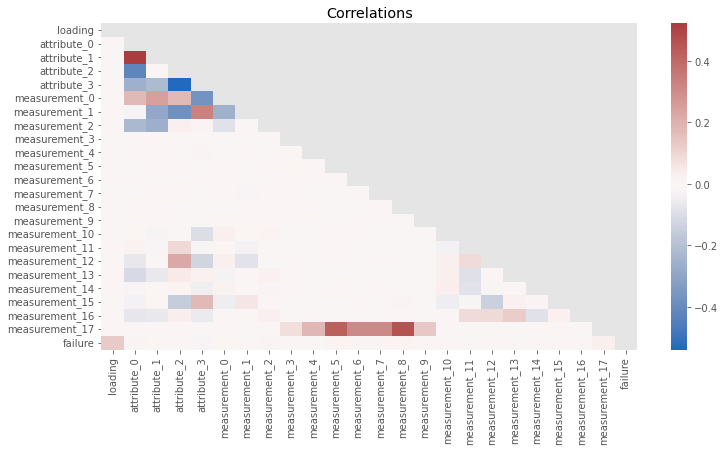

In [18]:
plt.figure(figsize=(12,6))
corr = scaledPseudoDF.corr()
matrix = np.triu(corr)
sns.heatmap(corr, mask = matrix, center = 0, cmap = 'vlag').set_title('Correlations')

<div style="color:white;display:fill;
            background-color:#3f4d6f;font-size:150%;
            font-family:Nexa;letter-spacing:0.5px">
    <p style="padding: 8px;color:white;"><b>3.4 | Handling outliers</b></p>
</div>

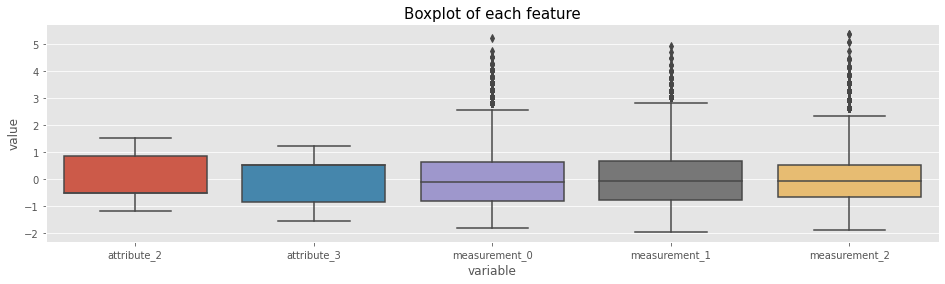

In [19]:
tmpDF = pd.DataFrame(data = scaledPseudoDF[intColumns].drop('failure', axis=1))
plt.figure(figsize=(16,4)) 
sns.boxplot(x="variable", y="value", data=pd.melt(tmpDF)).set_title('Boxplot of each feature',size=15)
plt.show()

* Floating value feature seems to have nore outliers compaired to integer value feature let more to find out about outlieries in floating value features.

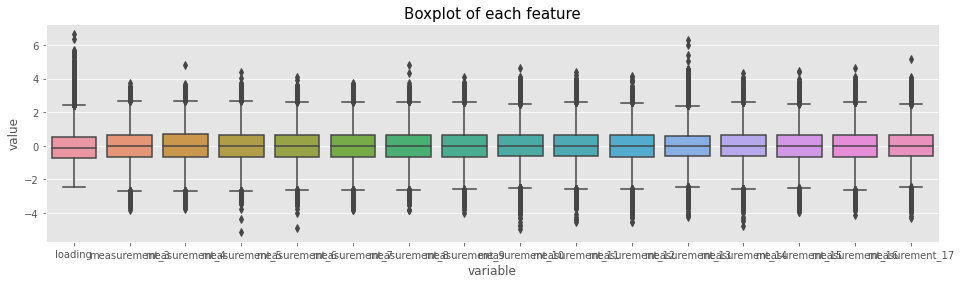

In [20]:
tmpDF = pd.DataFrame(data = scaledPseudoDF[floatColumns])
plt.figure(figsize=(16,4)) 
sns.boxplot(x="variable", y="value", data=pd.melt(tmpDF)).set_title('Boxplot of each feature',size=15)
plt.show()

In [21]:
for col in floatColumns:
    outlierLen = scaledPseudoDF[(scaledPseudoDF[col] <= -3) | (scaledPseudoDF[col] >= 3)].shape[0]
    outliersPercentage = round((outlierLen/len(scaledPseudoDF[col]))*100,2)
    print('% of outliers in col {} -> {}%'.format(col, outliersPercentage))

% of outliers in col loading -> 1.04%
% of outliers in col measurement_3 -> 0.27%
% of outliers in col measurement_4 -> 0.27%
% of outliers in col measurement_5 -> 0.24%
% of outliers in col measurement_6 -> 0.3%
% of outliers in col measurement_7 -> 0.35%
% of outliers in col measurement_8 -> 0.29%
% of outliers in col measurement_9 -> 0.34%
% of outliers in col measurement_10 -> 0.64%
% of outliers in col measurement_11 -> 0.5%
% of outliers in col measurement_12 -> 0.37%
% of outliers in col measurement_13 -> 0.76%
% of outliers in col measurement_14 -> 0.44%
% of outliers in col measurement_15 -> 0.43%
% of outliers in col measurement_16 -> 0.41%
% of outliers in col measurement_17 -> 0.46%


📌 Insights:
* There is somehwere around 1% of outliers in almost all the floating value features thus we try to cut this % to half so that our model can have some information about the outliers also when predicting value for test set.

In [22]:
for col in floatColumns:
    indexes = scaledPseudoDF[(scaledPseudoDF[col] <= -3) | (scaledPseudoDF[col] >= 3)].index
    scaledPseudoDF.drop(indexes, inplace=True)

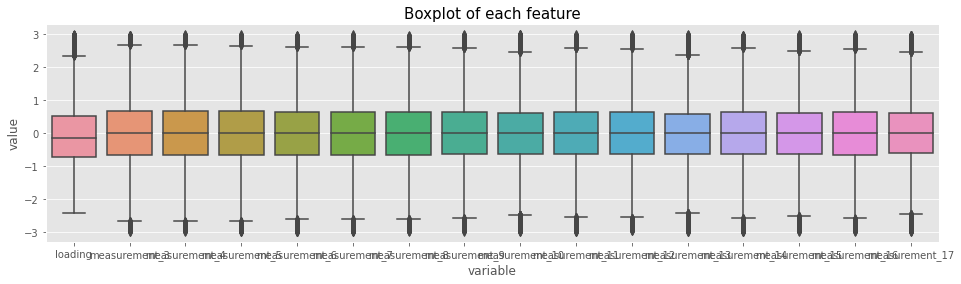

In [23]:
tmpDF = pd.DataFrame(data = scaledPseudoDF[floatColumns])
plt.figure(figsize=(16,4)) 
sns.boxplot(x="variable", y="value", data=pd.melt(tmpDF)).set_title('Boxplot of each feature',size=15)
plt.show()

# <b>4 <span style='color:#3f4d63'>|</span> Feature Selection</b>

<div style="color:white;display:fill;
            background-color:#3f4d6f;font-size:150%;
            font-family:Nexa;letter-spacing:0.5px">
    <p style="padding: 8px;color:white;"><b>4.1 | Variance Threshold</b></p>
</div>

* Feature selector that removes all low-variance features.

* This feature selection algorithm looks only at the features (X), not the desired outputs (y).

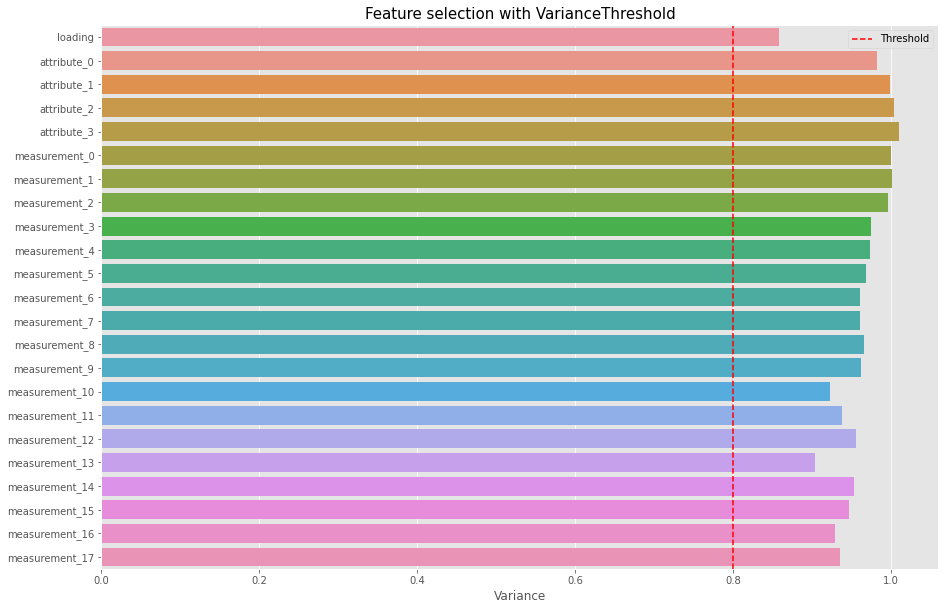

In [24]:
selector = VarianceThreshold(threshold=1)
selector.fit_transform(scaledPseudoDF.drop(['failure', 'product_code'], axis=1))
plt.figure(figsize=(15,10))
sns.barplot(x=selector.variances_, y=scaledPseudoDF.drop(['failure', 'product_code'], axis=1).columns,orient='h' ).set_title('Feature selection with VarianceThreshold',size=15);
plt.xlabel('Variance');
plt.axvline(x=.8, color='r', linestyle='--', label='Threshold')
plt.legend()

<div style="color:white;display:fill;
            background-color:#3f4d6f;font-size:150%;
            font-family:Nexa;letter-spacing:0.5px">
    <p style="padding: 8px;color:white;"><b>4.2 | Information Gain</b></p>
</div>

* MI Estimate mutual information for a discrete target variable.

* Mutual information (MI) between two random variables is a non-negative value, which measures the dependency between the variables. It is equal to zero if and only if two random variables are independent, and higher values mean higher dependency.

* The function relies on nonparametric methods based on entropy estimation from k-nearest neighbors distances.

<b>Inshort<b>

* A quantity called mutual information measures the amount of information one can obtain from one random variable given another.

* The mutual information between two random variables X and Y can be stated formally as follows:

<b>I(X ; Y) = H(X) – H(X | Y)<b>
Where I(X ; Y) is the mutual information for X and Y, H(X) is the entropy for X and H(X | Y) is the conditional entropy for X given Y. The result has the units of bits.

In [25]:
mutual_info = mutual_info_classif(scaledPseudoDF.drop(['failure', 'product_code'], axis=1),scaledPseudoDF['failure'])
mutual_info = pd.Series(mutual_info)
mutual_info.index = scaledPseudoDF.drop(['failure', 'product_code'], axis=1).columns
mutual_info.sort_values(ascending=False)

attribute_2       0.006024
loading           0.003641
measurement_3     0.002681
attribute_0       0.002297
measurement_17    0.002283
measurement_8     0.002115
measurement_12    0.001910
attribute_3       0.001624
measurement_7     0.001177
measurement_0     0.001032
measurement_6     0.000938
attribute_1       0.000919
measurement_11    0.000714
measurement_16    0.000295
measurement_15    0.000116
measurement_5     0.000000
measurement_4     0.000000
measurement_1     0.000000
measurement_10    0.000000
measurement_2     0.000000
measurement_13    0.000000
measurement_14    0.000000
measurement_9     0.000000
dtype: float64

<div style="color:white;display:fill;
            background-color:#3f4d6f;font-size:150%;
            font-family:Nexa;letter-spacing:0.5px">
    <p style="padding: 8px;color:white;"><b>4.3 | Extra Tree</b></p>
</div>

* This technique gives you a score for each feature of your data,the higher the score mor relevant it is

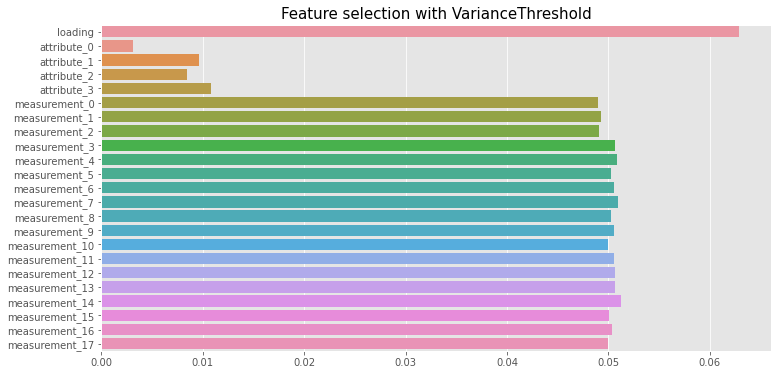

In [26]:
model = ExtraTreesClassifier()
model.fit(scaledPseudoDF.drop(['failure', 'product_code'], axis=1), scaledPseudoDF['failure'])
plt.figure(figsize=(12, 6))
sns.barplot(x=model.feature_importances_, y=scaledPseudoDF.drop(['failure', 'product_code'], axis=1).columns,orient='h' ).set_title('Feature selection with VarianceThreshold',size=15);
plt.show()

📌 Insights:

* Floating values feature seem to be more important compaired to some integer values feature to predict the dependable feature outcome.
* loading feature seems to be the best feature with highest importance across all features.

# <b>5 <span style='color:#3f4d63'>|</span> Model</b>

<div style="color:white;display:fill;
            background-color:#3f4d6f;font-size:150%;
            font-family:Nexa;letter-spacing:0.5px">
    <p style="padding: 8px;color:white;"><b>5.1 | Prepairing Test set</b></p>
</div>

* Prepairing test and performing all the transformation we did with train set so we can ready our test set for prediction.

In [27]:
_,_,_ = infoDF(testDF)

No of rows-> 20775, No of columns-> 24
          ------------------------          
product_code dtype -> string, % of null values-> 0.0%, No of distinct values-> 4
          ------------------------          
loading dtype -> float, % of null values-> 1.07%, No of distinct values-> 10741
          ------------------------          
attribute_0 dtype -> string, % of null values-> 0.0%, No of distinct values-> 2
          ------------------------          
attribute_1 dtype -> string, % of null values-> 0.0%, No of distinct values-> 3
          ------------------------          
attribute_2 dtype -> integer, % of null values-> 0.0%, No of distinct values-> 3
          ------------------------          
attribute_3 dtype -> integer, % of null values-> 0.0%, No of distinct values-> 4
          ------------------------          
measurement_0 dtype -> integer, % of null values-> 0.0%, No of distinct values-> 30
          ------------------------          
measurement_1 dtype -> integer, % 

In [28]:
testPseudoDF = testDF.copy()
for col in floatColumns:
    if testPseudoDF[col].isnull().sum():
        testPseudoDF[col].fillna(testPseudoDF[col].mean(), inplace=True)
testPseudoDF[floatColumns].isnull().sum()

loading           0
measurement_3     0
measurement_4     0
measurement_5     0
measurement_6     0
measurement_7     0
measurement_8     0
measurement_9     0
measurement_10    0
measurement_11    0
measurement_12    0
measurement_13    0
measurement_14    0
measurement_15    0
measurement_16    0
measurement_17    0
dtype: int64

In [29]:
for i in stringColumns:
    print('Unique Values for {} -> {}'.format(i, testDF[i].unique()))

Unique Values for product_code -> ['F' 'G' 'H' 'I']
Unique Values for attribute_0 -> ['material_5' 'material_7']
Unique Values for attribute_1 -> ['material_6' 'material_7' 'material_5']


In [30]:
testPseudoDF['attribute_1'] = testPseudoDF['attribute_1'].str.split('_', 1).str[1].astype('int')
testPseudoDF['attribute_0'] = testPseudoDF['attribute_0'].str.split('_', 1).str[1].astype('int')

In [31]:
scalerModel = StandardScaler().fit(testPseudoDF.drop('product_code', axis=1))
scaledtestPseudoDF = scalerModel.transform(testPseudoDF.drop('product_code', axis=1))
scaledtestPseudoDF = pd.DataFrame(scaledtestPseudoDF, columns=testPseudoDF.drop('product_code', axis=1).columns)
scaledtestPseudoDF['product_code'] = testPseudoDF['product_code']
scaledtestPseudoDF

,loading,attribute_0,attribute_1,attribute_2,attribute_3,measurement_0,measurement_1,measurement_2,measurement_3,measurement_4,...,measurement_9,measurement_10,measurement_11,measurement_12,measurement_13,measurement_14,measurement_15,measurement_16,measurement_17,product_code
0,-0.207095,-0.986469,0.014395,-1.325146,-1.145711,-0.340067,0.008674,-0.033091,1.520330,-1.554227e+00,...,-0.629821,-0.141007,-0.502779,1.405370,-1.581062,0.515180,-0.924209,6.815891e-01,-0.535806,F
1,-0.362707,-0.986469,0.014395,-1.325146,-1.145711,0.829695,-0.222055,-1.597307,0.090055,2.003004e-01,...,0.627937,-1.394413,0.000000,0.422700,1.318294,0.429200,-0.228655,-1.608255e+00,-1.318719,F
2,-0.397373,-0.986469,0.014395,-1.325146,-1.145711,0.127838,0.700860,-0.554497,0.685500,-1.250269e+00,...,0.332415,0.604740,-0.492420,-0.761951,-1.806372,-0.284367,1.311116,-3.903475e-01,-0.340164,F
3,-0.382993,-0.986469,0.014395,-1.325146,-1.145711,0.127838,0.470131,1.009719,-1.282889,-8.419832e-01,...,0.380476,1.338681,-1.737436,-0.742283,-0.178958,-0.335809,-1.678960,-3.332283e-01,-0.859249,F
4,2.063661,-0.986469,0.014395,-1.325146,-1.145711,1.531552,1.623774,0.488314,0.014618,9.687212e-01,...,0.973565,-1.013997,-0.645862,0.020251,0.254156,0.043389,-1.205391,3.261809e-01,0.799596,F
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20770,0.439235,1.013716,-1.409698,0.967548,-0.624180,-1.743781,-1.144969,0.749016,0.675441,8.453325e-01,...,0.279242,0.000000,0.598507,-0.266455,1.149310,-0.729703,0.062616,2.254756e-15,-0.039507,I
20771,-1.363658,1.013716,-1.409698,0.967548,-0.624180,-0.807972,-0.222055,0.227611,1.112973,-1.837118e+00,...,-0.447804,-0.063612,-2.041083,1.248022,-0.184286,-0.608448,-0.877122,-8.571186e-02,-0.707216,I
20772,-1.538272,1.013716,-1.409698,0.967548,-0.624180,0.595742,0.470131,-1.075902,0.867553,3.563941e-15,...,-1.004081,0.008536,1.142999,-0.590230,0.595929,-0.440161,-0.632938,6.930129e-01,0.657616,I
20773,-0.038130,1.013716,-1.409698,0.967548,-0.624180,0.127838,1.623774,1.270422,-1.264784,-5.029150e-01,...,1.282381,-0.460426,0.420462,-1.963245,0.061577,0.939940,0.888671,-9.247291e-01,0.351600,I


In [32]:
Xtrain = scaledPseudoDF.drop('failure', axis=1).reset_index(drop=True)
ytrain = scaledPseudoDF['failure'].reset_index(drop=True)
Xtest = scaledtestPseudoDF

In [33]:
def getScore(model, yval, yvalPred):
    valScore = roc_auc_score(yval, yvalPred)
    print("Model -> {}, Validation Score -> {}".format(model, valScore))

In [34]:
predictProbs = pd.DataFrame()

<div style="color:white;display:fill;
            background-color:#3f4d6f;font-size:150%;
            font-family:Nexa;letter-spacing:0.5px">
    <p style="padding: 8px;color:white;"><b>5.2 | Group K Fold</b></p>
</div>

* We want to create a classifier which predicts correct probabilities for previously unseen products. To validate such a classifier, we have to simulate this situation by splitting the data so that the validation set contains other products than the training set. The correct method is a five-fold cross-validation where every fold uses four products for training and the fifth product for validation (GroupKFold).

Fold 0: Train on products A, B, C, D; validate on E<br>
Fold 1: Train on products A, B, C, E; validate on D<br>
Fold 2: Train on products A, B, D, E; validate on C<br>
Fold 3: Train on products A, C, D, E; validate on B<br>
Fold 4: Train on products B, C, D, E; validate on A<br>

* If you don't split your data with the GroupKFold on products, you'll get a data leak and inflated cross-validation scores. 
<b> **Idea by @AmbrosM** <b>

In [35]:
gkf = GroupKFold(n_splits=5)
for fold, (idx_tr, idx_va) in enumerate(gkf.split(Xtrain, ytrain, Xtrain.product_code)):
    print(f"===== fold{fold} =====")
    
    X_train = Xtrain.iloc[idx_tr][Xtest.columns]
    X_valid = Xtrain.iloc[idx_va][Xtest.columns]
    X_test = Xtest.copy()
    y_train = ytrain.iloc[idx_tr]
    y_valid = ytrain.iloc[idx_va]
    
    features = [f for f in X_train.columns if f != 'product_code']
        # Logistic Regression
    
    lrModel = LogisticRegression().fit(X_train[features], y_train)
    yValPred = lrModel.predict_proba(X_valid[features])[:,1]
    getScore('Logistic Regression', y_valid, yValPred)  
    predictProbs[f'LR_{fold}'] = lrModel.predict_proba(X_test[features])[:,1]
    
    del lrModel, yValPred
    gc.collect()
    
        
    # SVM 
    
    svcModel = SVC(probability=True).fit(X_train[features], y_train)
    yValPred = svcModel.predict_proba(X_valid[features])[:,1]
    getScore('SVM', y_valid, yValPred)
    predictProbs[f'SVC_{fold}'] = svcModel.predict_proba(X_test[features])[:,1]
    
    del svcModel, yValPred
    gc.collect()
    
    # K Neighbours 
    
    knnModel = KNeighborsClassifier(n_neighbors=20).fit(X_train[features], y_train)
    yValPred = knnModel.predict_proba(X_valid[features])[:,1]
    getScore('KNN', y_valid, yValPred)
    predictProbs[f'KNN_{fold}'] = knnModel.predict_proba(X_test[features])[:,1]
    
    del knnModel, yValPred
    gc.collect()
    
    
    
    

===== fold0 =====
Model -> Logistic Regression, Validation Score -> 0.5706115212464166
Model -> SVM, Validation Score -> 0.5082077689310527
Model -> KNN, Validation Score -> 0.5025983849435945
===== fold1 =====
Model -> Logistic Regression, Validation Score -> 0.5791554221446129
Model -> SVM, Validation Score -> 0.5013454942538688
Model -> KNN, Validation Score -> 0.5208198038281885
===== fold2 =====
Model -> Logistic Regression, Validation Score -> 0.5909847290251764
Model -> SVM, Validation Score -> 0.5260974521753274
Model -> KNN, Validation Score -> 0.5184989758638927
===== fold3 =====
Model -> Logistic Regression, Validation Score -> 0.5880032874452221
Model -> SVM, Validation Score -> 0.5363927573600707
Model -> KNN, Validation Score -> 0.5255519604111154
===== fold4 =====
Model -> Logistic Regression, Validation Score -> 0.5846505905297098
Model -> SVM, Validation Score -> 0.5322708016108132
Model -> KNN, Validation Score -> 0.5151160989698997


<div style="color:white;display:fill;
            background-color:#3f4d6f;font-size:150%;
            font-family:Nexa;letter-spacing:0.5px">
    <p style="padding: 8px;color:white;"><b>5.3 | Combining Results</b></p>
</div>

* Combining result of best fermormed model and submitting values

In [36]:
requiredPredCols = [col for col in predictProbs if 'LR' in col]
failure = predictProbs[requiredPredCols].sum(axis=1)/5

In [37]:
submission = pd.read_csv('../input/tabular-playground-series-aug-2022/sample_submission.csv')
submission['failure'] = failure
submission.to_csv('firstSubmission.csv', index=False)
submission

,id,failure
0,26570,0.207930
1,26571,0.153611
2,26572,0.180097
3,26573,0.191010
4,26574,0.335923
...,...,...
20770,47340,0.232304
20771,47341,0.162562
20772,47342,0.145623
20773,47343,0.225939


<div style="color:white;display:fill;
            background-color:#3f4d6f;font-size:150%;
            font-family:Nexa;letter-spacing:0.5px">
    <p style="padding: 8px;color:white;"><b>Future Work</b></p>
</div>

1. Ensembling Model Result
2. Votting Classifier